In [0]:
import numpy as np
import sklearn
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz


**2) Trabajando con el dataset de diagnóstico de Cancer de Mama del Hospital de Winsconsin**

**a.- Cargue el dataset de load_breast_cancer provisto por sklearn y verifique el tipo de dato importado.**

In [12]:
cancer = load_breast_cancer()
type(cancer)

sklearn.utils.Bunch

**b.- Verifique cuales son las claves del objeto Bunch.**

In [13]:
print("Keys of cancer: {}".format(cancer.keys()))

Keys of cancer: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


**c.- Verifique la forma del dataset. Cantidad de instancias y features.**


In [14]:
print(cancer.data.shape)
print(cancer.DESCR)

(569, 30)
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean

**d.- Genere un modelo de árbol de desición usando el clasificador DecisionTreeClassifier**

**e.- Separe el dataset en 63% para train set y 37% para test set. Use la función train_test_split**

**f.- Usando el método score() del modelo entrenado verifique la Accuracy para el conjunto de entrenamiento y para el conjunto de pruebas.**

In [15]:
xTrain, xTest, yTrain, yTest = train_test_split(cancer.data,cancer.target,stratify=cancer.target,test_size=0.37)
def build_tree(profundidad=None):
    tree = DecisionTreeClassifier(max_depth=profundidad,random_state=0)
    tree.fit(xTrain, yTrain)
    print("Profundidad: {0}".format(profundidad))
    print("Training Accuracy: {0:.4f}".format(tree.score(xTrain, yTrain)))
    print("Testing Accuracy: {0:.4f}".format(tree.score(xTest, yTest)))

build_tree()

Profundidad: None
Training Accuracy: 1.0000
Testing Accuracy: 0.9242


**¿Por qué el conjunto de entrenamiento tiene una accuracy más alto?**
**¿Qué significa que tenga una precisión de 1.00 sobre el conjunto de  entrenamiento? ¿Es posible que exista un sobreajuste?**
**¿De qué forma podemos aliviar este problema?**

El modelo esta sobreajustado, el mismo no es capaz de generalizar lo suficiente porque le permitimos crecer hasta que cada hoja estuviera pura. Debido a esto cada instancia de los datos de entrenamiento eventualmente va a llegar a la hoja que lo contiene.
Una solucion seria lograr la generalización del arbol mediante la poda.

**g.- Configure el hiperparámetro max_depth=4. y realice un nuevo entrenamiento. ¿Que logra este hiperparámetro? Verifique los nuevos valores de Accuracy para el conjunto de entrenamiento y el de pruebas.**

In [25]:
build_tree(4)

Profundidad: 4
Training Accuracy: 0.9916
Testing Accuracy: 0.9242


Este hiper parametro logra limitar la profundidad del arbol, logrando asi quitar complejidad al modelo y ganar generalizacion para la clasificacion.

**h.- Pruebe el siguiente código y analice la gráfica resultante. ¿Que puede concluir sobre esta?**

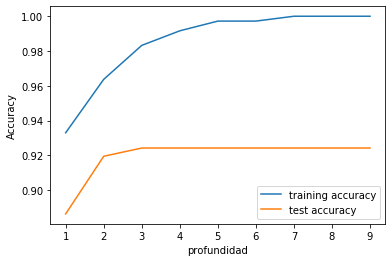

In [17]:
training_accuracy = []
test_accuracy = []
# probar profundidades de 1 a 10
profundidades_settings = range(1, 10)
for n_prof in profundidades_settings:
  # build the model
  clf = DecisionTreeClassifier(max_depth=n_prof, random_state=0)
  clf.fit(xTrain, yTrain)
  # record training set accuracy
  training_accuracy.append(clf.score(xTrain, yTrain))
  # record generalization accuracy
  test_accuracy.append(clf.score(xTest, yTest))
plt.plot(profundidades_settings, training_accuracy, label="training accuracy")
plt.plot(profundidades_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("profundidad")
plt.legend()

**i.- Es interesante visualizar el árbol de decisión generado, exportándolo como un archivo ".dot" (formato de archivo de textos para almacenar grafos) y visualizandolo con graphviz. Pruebe el siguiente código y analice su salida:**

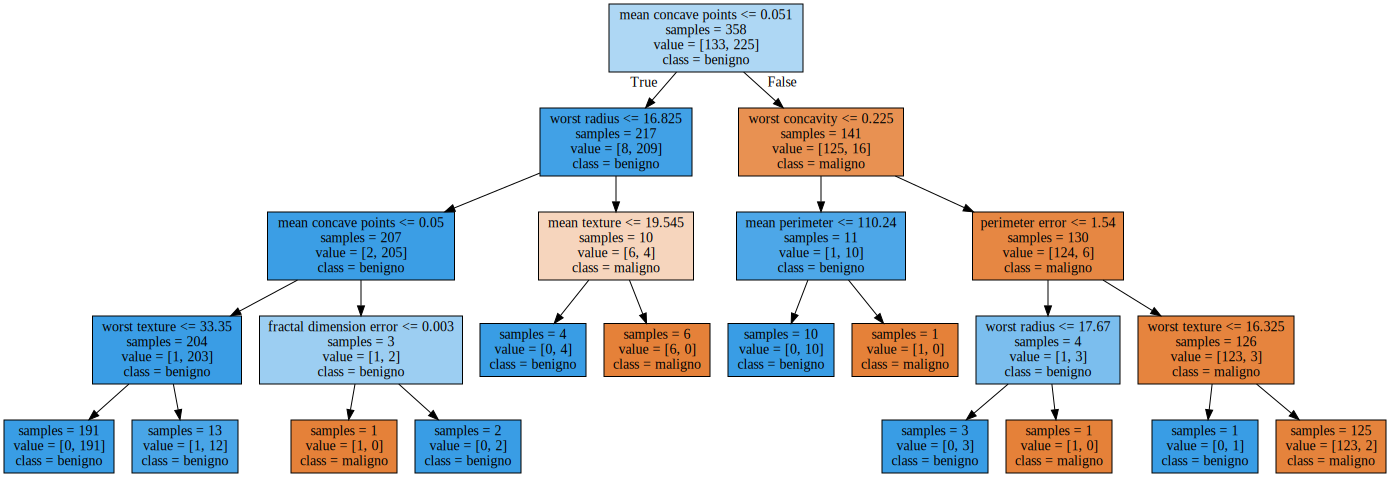

In [18]:
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(xTrain, yTrain)
export_graphviz(tree, out_file="tree.dot", class_names=["maligno", "benigno"],feature_names=cancer.feature_names, impurity=False, filled=True)
with open("tree.dot") as f:
  dot_graph = f.read()
  display(graphviz.Source(dot_graph))

**j.- Otra herramienta que nos puede ayudar en el análisis es determinar la  importancia de los atributos en la construcción del árbol. Es un número entre 0 y 1 para cada feature donde 0 significa "no es considerado en absoluto" y 1 significa "perfectamente predice la clase". Las importancias de todas las características siempre deben sumar 1: Podemos obtener esa información por medio de la propiedad feature_importances_ del modelo.**

**Por ej. print("Feature importances:\n{}".format(tree.feature_importances_))**

**Verifique y nombre cuales són los 5 atributos más importantes considerados por el árbol de construcción en el problema de Cancer de Mama.**

In [19]:
importances=tree.feature_importances_
print("Feature importances:\n{}".format(importances))

Feature importances:
[0.         0.0297404  0.0112653  0.         0.         0.
 0.         0.76852702 0.         0.         0.         0.
 0.02533517 0.         0.         0.         0.         0.
 0.         0.00826122 0.0504892  0.01279571 0.         0.
 0.         0.         0.09358597 0.         0.         0.        ]


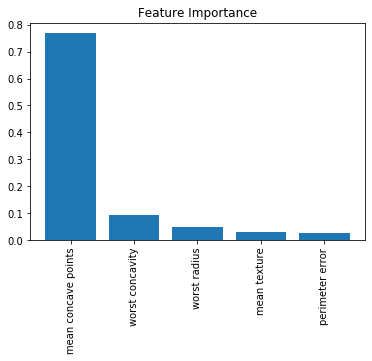

In [20]:
indices = np.argsort(importances)[::-1]
indices=indices[:5]
names = [cancer.feature_names[i] for i in indices]
plt.figure()
plt.title("Feature Importance")
plt.bar(range(5), importances[indices])
plt.xticks(range(5), names, rotation=90)
plt.show()